In [1]:
pip install spotipy

Note: you may need to restart the kernel to use updated packages.Collecting spotipy

                                              0.0/250.3 kB ? eta -:--:--
     ------                                41.0/250.3 kB 653.6 kB/s eta 0:00:01
     ------                                41.0/250.3 kB 653.6 kB/s eta 0:00:01
     ------                                41.0/250.3 kB 653.6 kB/s eta 0:00:01
     -------------                         92.2/250.3 kB 438.1 kB/s eta 0:00:01
     --------------------                 143.4/250.3 kB 568.9 kB/s eta 0:00:01
     -------------------------            174.1/250.3 kB 655.4 kB/s eta 0:00:01
     -----------------------------        204.8/250.3 kB 593.2 kB/s eta 0:00:01
     -----------------------------------  245.8/250.3 kB 656.0 kB/s eta 0:00:01
     -----------------------------------  245.8/250.3 kB 656.0 kB/s eta 0:00:01
     ------------------------------------ 250.3/250.3 kB 549.3 kB/s eta 0:00:00


In [ ]:
client_id = "2a9695b07f0247e5bb884ea54befa330"
client_secret = "9ba71ab5e1224045a8f32fb29ed990d1"

In [26]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd

# Set your Spotify API credentials
client_id = '2a9695b07f0247e5bb884ea54befa330'
client_secret = '9ba71ab5e1224045a8f32fb29ed990d1'

# Authenticate with the Spotify API
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=client_id, client_secret=client_secret))

# Function to get track data and save to CSV
def get_track_data(artist_name, album_name, csv_filename):
    # Get artist's top tracks
    results = sp.search(q=f'artist:{artist_name} album:{album_name}', type='album')
    
    if not results['albums']['items']:
        print(f"Album '{album_name}' by '{artist_name}' not found.")
        return
    
    album_id = results['albums']['items'][0]['id']
    
    # Get album details
    album_info = sp.album(album_id)
    
    # Get album tracks
    album_tracks = sp.album_tracks(album_id)
    
    # Create a DataFrame to store track information
    columns = ['Track Name', 'Valence', 'Danceability', 'Energy', 'Unique Listeners', 'Duration (ms)',
               'Key', 'Mode', 'Tempo', 'Time Signature', 'Loudness', 'Instrumentalness', 'Acousticness',
               'Speechiness', 'Liveness', 'Release Year', 'Popularity']
    tracks_df = pd.DataFrame(columns=columns)
    
    # Inside the loop
    for track in album_tracks['items']:
        # Get audio features for the track
        track_info = sp.audio_features(track['id'])[0]
        
        # Track data dictionary
        track_data = {
            'Track Name': track['name'],
            'Valence': track_info['valence'],
            'Danceability': track_info['danceability'],
            'Energy': track_info['energy'],
            'Unique Listeners': len(track_info.get('listeners', [])),
            'Duration (ms)': track_info['duration_ms'],
            'Key': track_info['key'],
            'Mode': track_info['mode'],
            'Tempo': track_info['tempo'],
            'Time Signature': track_info['time_signature'],
            'Loudness': track_info['loudness'],
            'Instrumentalness': track_info['instrumentalness'],
            'Acousticness': track_info['acousticness'],
            'Speechiness': track_info['speechiness'],
            'Liveness': track_info['liveness'],
            'Release Year': int(album_info['release_date'][:4]) if 'release_date' in album_info else None,
            'Popularity': track['popularity'] if 'popularity' in track else None,
        }
        
        # Convert the track_data dictionary to a DataFrame
        track_df = pd.DataFrame([track_data])

        # Concatenate the new track_df with the existing tracks_df
        tracks_df = pd.concat([tracks_df, track_df], ignore_index=True)

    # Save DataFrame to CSV
    tracks_df.to_csv(csv_filename, index=False)
    
    # Display the tracks DataFrame
    print(tracks_df)

# Example usage
get_track_data('ODUMODUBLVCK', 'eziokwu(uncut)', 'track_data_odumodublvck_eziokwu(uncut).csv')


                                           Track Name  Valence  Danceability  \
0                      ABUJA PEOPLE (feat. Decosuave)    0.559         0.561   
1            HOTEL LOBBY (feat. Anti World Gangstars)    0.463         0.732   
2     BADMAN BOUNCE (feat. Reeplay and Duncan Mighty)    0.591         0.642   
3                            MINIMAL FUSS (feat. Boj)    0.574         0.626   
4                A1 PERICO (feat. Nasty C and Mizzle)    0.451         0.682   
5                NO PROTOCOL (feat. Teni and Masicka)    0.381         0.594   
6             WOTOWOTO SEASONING (feat. Black Sherif)    0.294         0.592   
7                                             COMMEND    0.626         0.593   
8                                         DECLAN RICE    0.663         0.717   
9                             KUBOLOR (feat. Amaarae)    0.735         0.740   
10                                        ADAMMA BEKE    0.474         0.668   
11                                  SHOO

In [37]:
df = pd.read_csv('track_data_odumodublvck_eziokwu(uncut).csv')
display(df)

,Track Name,Valence,Danceability,Energy,Unique Listeners,Duration (ms),Key,Mode,Tempo,Time Signature,Loudness,Instrumentalness,Acousticness,Speechiness,Liveness,Release Year,Popularity
0,ABUJA PEOPLE (feat. Decosuave),0.559,0.561,0.687,0,160825,11,0,96.554,4,-8.678,0.000549,0.2170,0.2760,0.1420,2023,NaN
1,HOTEL LOBBY (feat. Anti World Gangstars),0.463,0.732,0.658,0,207692,11,0,138.554,5,-7.883,0.000000,0.1360,0.4220,0.1370,2023,NaN
2,BADMAN BOUNCE (feat. Reeplay and Duncan Mighty),0.591,0.642,0.679,0,226019,7,0,205.762,4,-7.442,0.000008,0.5390,0.3120,0.1530,2023,NaN
3,MINIMAL FUSS (feat. Boj),0.574,0.626,0.569,0,176170,4,0,125.244,3,-7.766,0.004650,0.0970,0.2900,0.0929,2023,NaN
4,A1 PERICO (feat. Nasty C and Mizzle),0.451,0.682,0.549,0,209143,10,0,140.152,4,-9.259,0.000000,0.1960,0.3030,0.1700,2023,NaN
5,NO PROTOCOL (feat. Teni and Masicka),0.381,0.594,0.649,0,194851,6,0,133.626,5,-7.015,0.000018,0.4950,0.2460,0.1530,2023,NaN
6,WOTOWOTO SEASONING (feat. Black Sherif),0.294,0.592,0.536,0,171089,1,0,136.087,5,-8.872,0.010100,0.6410,0.3440,0.1360,2023,NaN
7,COMMEND,0.626,0.593,0.586,0,148800,5,0,68.363,3,-9.155,0.000000,0.1210,0.2660,0.1320,2023,NaN
8,DECLAN RICE,0.663,0.717,0.789,0,124000,4,0,187.969,4,-6.351,0.005350,0.0316,0.2420,0.0911,2023,NaN
9,KUBOLOR (feat. Amaarae),0.735,0.740,0.727,0,129057,11,0,106.211,4,-7.306,0.000092,0.3140,0.2090,0.3110,2023,NaN


In [32]:
df.describe()

,Valence,Danceability,Energy,Duration (ms),Key,Mode,Tempo,Time Signature,Loudness,Instrumentalness,Acousticness,Speechiness,Liveness
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,0.575524,0.694952,0.670810,174369.904762,7.047619,0.142857,124.588048,4.095238,-7.532143,0.001352,0.254033,0.238824,0.149048
std,0.164353,0.100967,0.125805,36858.724069,3.323796,0.358569,33.815275,0.538958,1.400486,0.002732,0.182416,0.103475,0.072708
min,0.236000,0.536000,0.454000,107413.000000,1.000000,0.000000,65.032000,3.000000,-10.546000,0.000000,0.013900,0.046000,0.048400
25%,0.474000,0.622000,0.569000,148800.000000,5.000000,0.000000,106.082000,4.000000,-8.376000,0.000005,0.121000,0.164000,0.097300
50%,0.577000,0.682000,0.658000,172941.000000,7.000000,0.000000,125.244000,4.000000,-7.526000,0.000018,0.217000,0.252000,0.137000
75%,0.675000,0.740000,0.789000,194851.000000,10.000000,0.000000,140.152000,4.000000,-6.498000,0.000549,0.329000,0.303000,0.155000
max,0.923000,0.919000,0.900000,240000.000000,11.000000,1.000000,205.762000,5.000000,-4.654000,0.010100,0.641000,0.422000,0.341000


In [38]:
df = df.drop(['Unique Listeners', 'Release Year', 'Popularity'], axis=1)

In [40]:
df ['Duration (ms)'] = df ['Duration (ms)']/60000

In [41]:
display(df)

,Track Name,Valence,Danceability,Energy,Duration (ms),Key,Mode,Tempo,Time Signature,Loudness,Instrumentalness,Acousticness,Speechiness,Liveness
0,ABUJA PEOPLE (feat. Decosuave),0.559,0.561,0.687,2.680417,11,0,96.554,4,-8.678,0.000549,0.2170,0.2760,0.1420
1,HOTEL LOBBY (feat. Anti World Gangstars),0.463,0.732,0.658,3.461533,11,0,138.554,5,-7.883,0.000000,0.1360,0.4220,0.1370
2,BADMAN BOUNCE (feat. Reeplay and Duncan Mighty),0.591,0.642,0.679,3.766983,7,0,205.762,4,-7.442,0.000008,0.5390,0.3120,0.1530
3,MINIMAL FUSS (feat. Boj),0.574,0.626,0.569,2.936167,4,0,125.244,3,-7.766,0.004650,0.0970,0.2900,0.0929
4,A1 PERICO (feat. Nasty C and Mizzle),0.451,0.682,0.549,3.485717,10,0,140.152,4,-9.259,0.000000,0.1960,0.3030,0.1700
5,NO PROTOCOL (feat. Teni and Masicka),0.381,0.594,0.649,3.247517,6,0,133.626,5,-7.015,0.000018,0.4950,0.2460,0.1530
6,WOTOWOTO SEASONING (feat. Black Sherif),0.294,0.592,0.536,2.851483,1,0,136.087,5,-8.872,0.010100,0.6410,0.3440,0.1360
7,COMMEND,0.626,0.593,0.586,2.480000,5,0,68.363,3,-9.155,0.000000,0.1210,0.2660,0.1320
8,DECLAN RICE,0.663,0.717,0.789,2.066667,4,0,187.969,4,-6.351,0.005350,0.0316,0.2420,0.0911
9,KUBOLOR (feat. Amaarae),0.735,0.740,0.727,2.150950,11,0,106.211,4,-7.306,0.000092,0.3140,0.2090,0.3110


In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

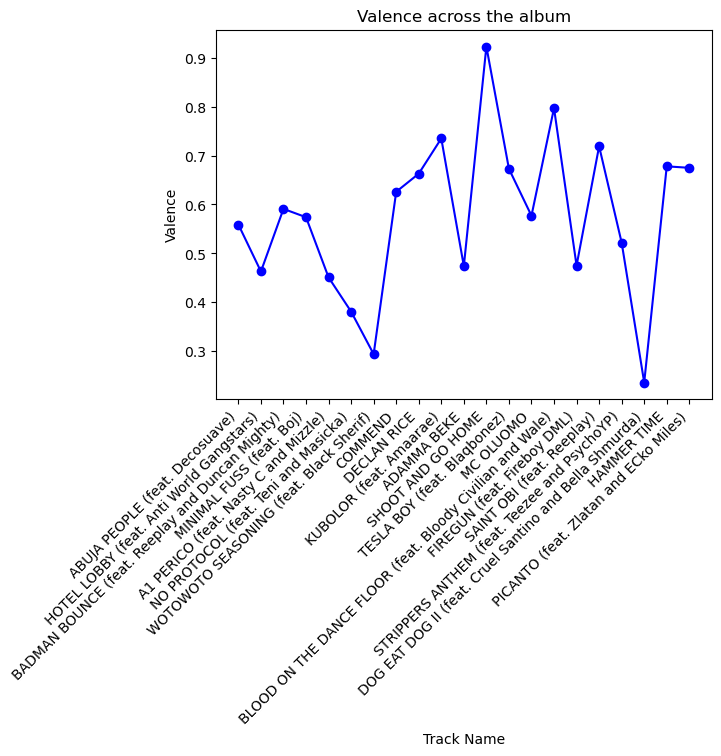

In [43]:
#plotting the valence
plt.plot(df['Track Name'], df['Valence'], marker='o', linestyle='-', color='b')
plt.xlabel('Track Name')
plt.ylabel('Valence')
plt.title('Valence across the album')
plt.xticks(rotation=45, ha='right')
plt.show()

In [46]:
#checking for mean and median values
mean_valence = df['Valence'].mean()
median_valence = df['Valence'].median()
print(mean_valence)
print(median_valence)

0.5755238095238097
0.577


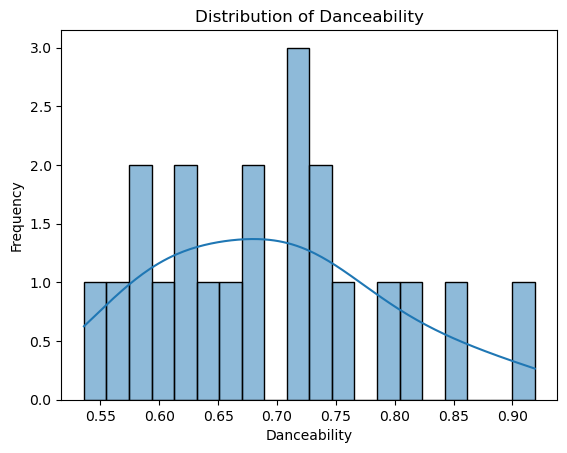

In [61]:
#exploring danceability distribution across the album
sns.histplot(df['Danceability'], bins=20, kde=True)
plt.xlabel('Danceability')
plt.ylabel('Frequency')
plt.title('Distribution of Danceability')
plt.show()

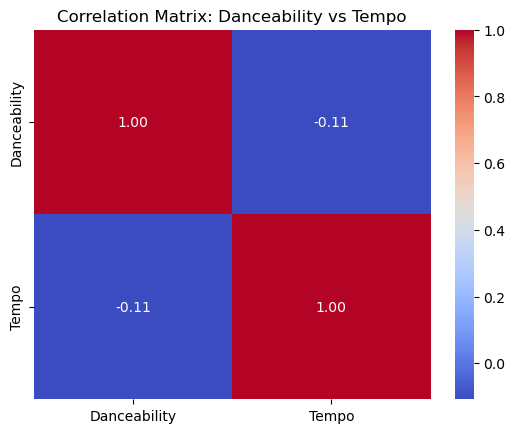

In [50]:
#correlation analysis
correlation_matrix = df[['Danceability', 'Tempo']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix: Danceability vs Tempo')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

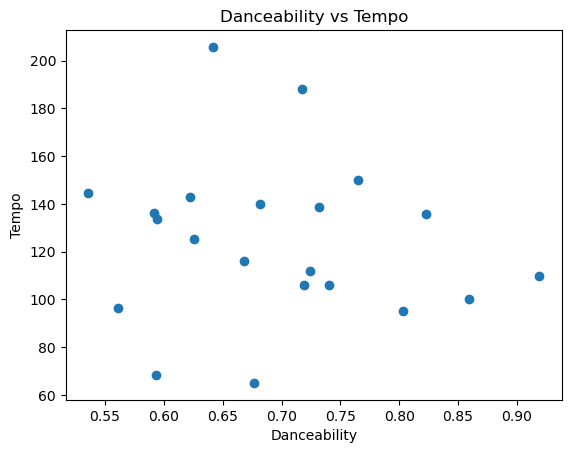

In [51]:
plt.scatter(df['Danceability'], df['Tempo'])
plt.xlabel('Danceability')
plt.ylabel('Tempo')
plt.title('Danceability vs Tempo')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

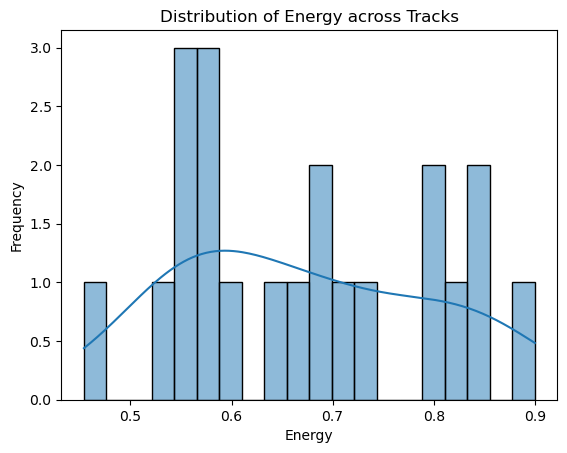

In [52]:
#exploring energy distribution 
sns.histplot(df['Energy'], bins=20, kde=True)
plt.xlabel('Energy')
plt.ylabel('Frequency')
plt.title('Distribution of Energy across Tracks')
plt.show

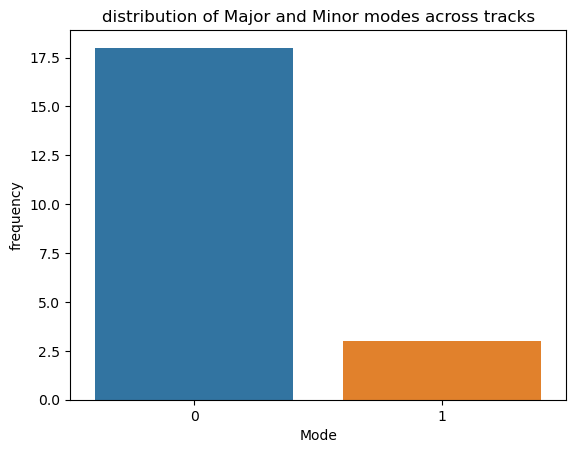

In [54]:
#Exploring mode distribution
sns.countplot(x='Mode', data=df)
plt.xlabel('Mode')
plt.ylabel('frequency')
plt.title('distribution of Major and Minor modes across tracks')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

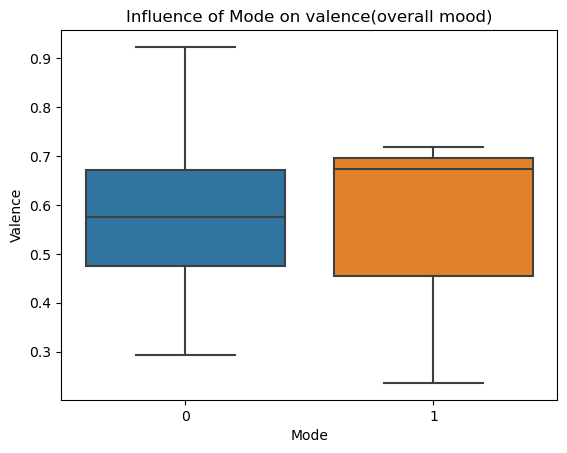

In [55]:
#Assessing mood influence 
sns.boxplot(x='Mode', y='Valence', data=df)
plt.xlabel('Mode')
plt.ylabel('Valence')
plt.title('Influence of Mode on valence(overall mood)')
plt.show

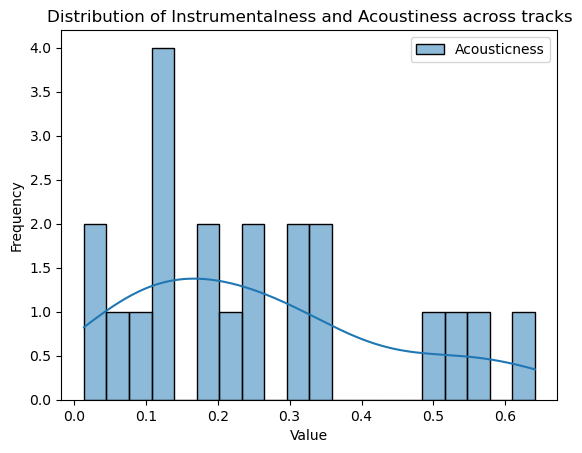

In [57]:
#Exploring instrumentalness and acousticness distributions 

sns.histplot(df['Acousticness'], bins=20, kde=True, label='Acousticness')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of Instrumentalness and Acoustiness across tracks')
plt.legend()
plt.show()

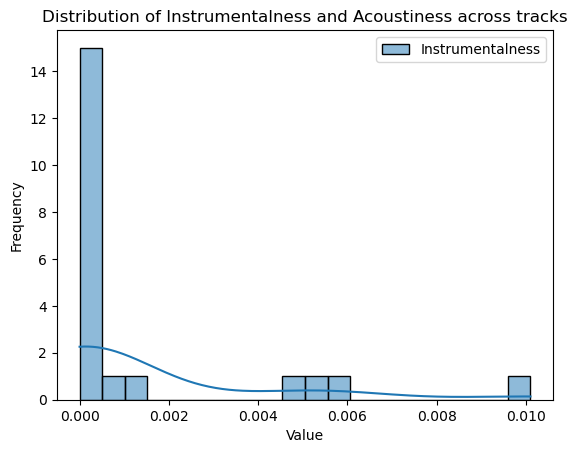

In [58]:
sns.histplot(df['Instrumentalness'], bins=20, kde=True, label='Instrumentalness')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of Instrumentalness and Acoustiness across tracks')
plt.legend()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

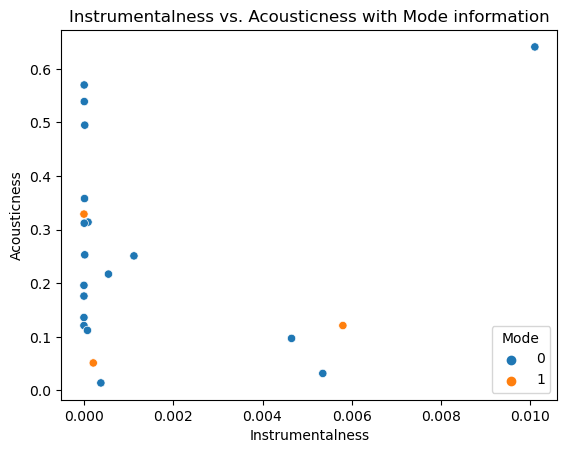

In [59]:
sns.scatterplot(x='Instrumentalness', y='Acousticness', hue='Mode', data=df)
plt.xlabel('Instrumentalness')
plt.ylabel('Acousticness')
plt.title('Instrumentalness vs. Acousticness with Mode information')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

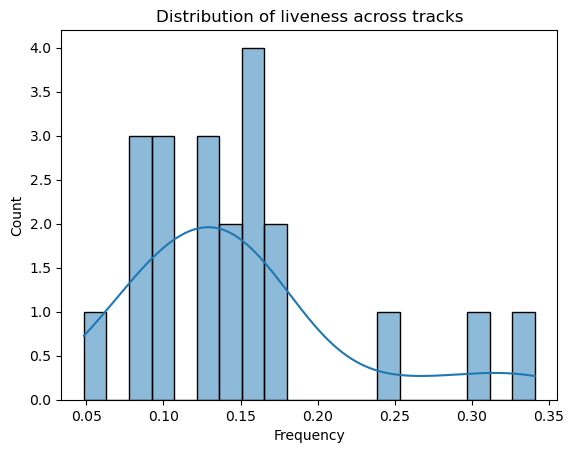

In [60]:
#exploring distribution of liveness
sns.histplot(df['Liveness'], bins=20, kde=True)
plt.xlabel('Liveness')
plt.xlabel('Frequency')
plt.title('Distribution of liveness across tracks')
plt.show